Implementing KNN Regression with Scikit-Learn using Diabetes Dataset

Step 1: Import Libraries
In this step, we import the necessary libraries for loading the dataset, splitting the data, training the KNN model, evaluating the model, and visualizing the results.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

Step 2: Load the Dataset
Here, we load the Diabetes dataset using Scikit-Learn’s load_diabetes function. This dataset includes ten baseline variables and a target variable representing the disease progression.

In [6]:
# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Print dataset description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Load the dataset and convert to a pandas DataFrame
diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['disease_progression'] = diabetes.target


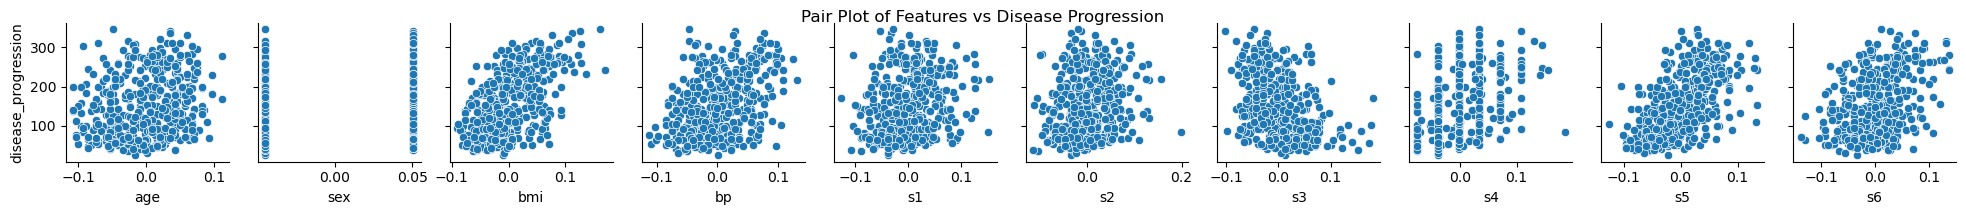

In [11]:
sns.pairplot(data, y_vars='disease_progression', x_vars=diabetes.feature_names, height=2, aspect=1)
plt.suptitle("Pair Plot of Features vs Disease Progression", y=1.02)
plt.show()


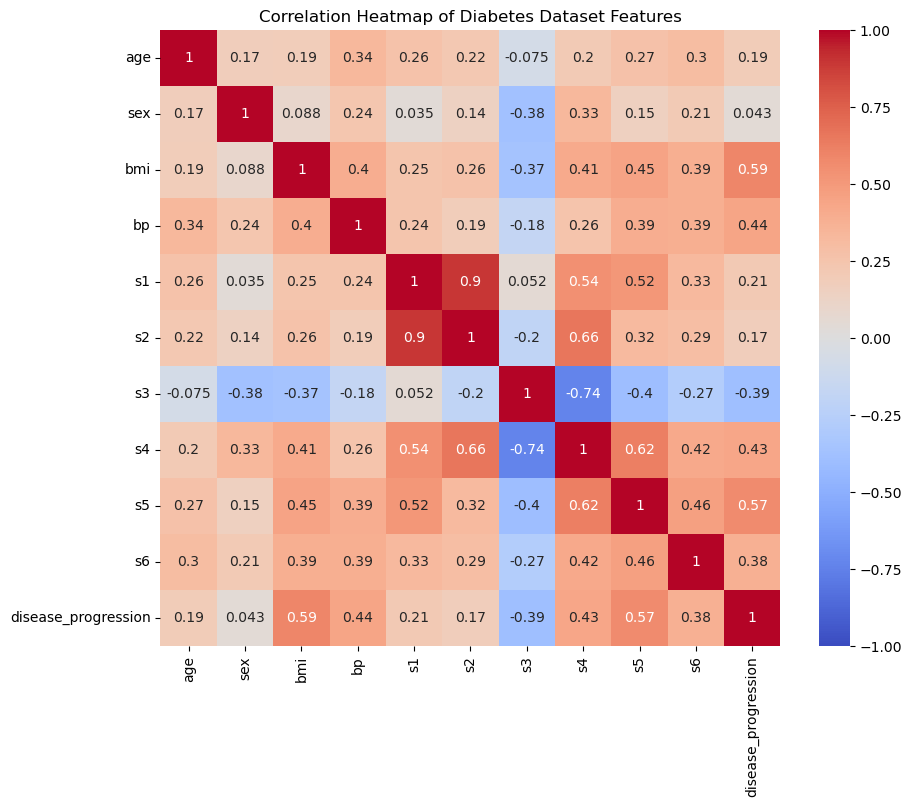

In [13]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Diabetes Dataset Features")
plt.show()


Step 3: Split the Dataset
We split the dataset into training and testing sets using the train_test_split function. This step ensures that we have separate data for training the model and evaluating its performance.

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 4: Standardize the Features
In this step, we standardize the features using StandardScaler. Standardization ensures that each feature has a mean of 0 and a standard deviation of 1, which helps improve the performance of the KNN algorithm.

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 5: Create and Train the KNN Regressor
We create an instance of the KNeighborsRegressor with a specified number of neighbors (K=5) and train the model using the training data.

In [11]:
# Create and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

Step 6: Make Predictions
We use the trained KNN regressor to make predictions on the test data.

In [14]:
# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

Step 7: Evaluate the Model
Here, we evaluate the model’s performance using the Mean Squared Error (MSE) and R-squared (R²) metrics. These metrics help us understand how well the model is performing.

In [17]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3047.449887640449
R-squared: 0.42480887066066253


Step 8: Visualize the Results
Finally, we visualize the actual and predicted values using a scatter plot. This step helps us visually assess the model’s performance.

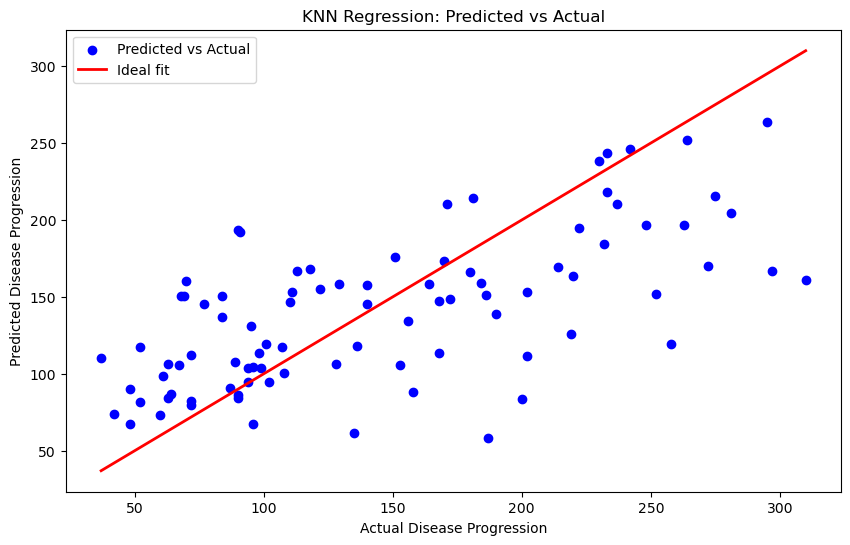

In [20]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal fit')
plt.title('KNN Regression: Predicted vs Actual')
plt.xlabel('Actual Disease Progression')
plt.ylabel('Predicted Disease Progression')
plt.legend()
plt.show()

In [30]:
# Import necessary libraries
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
diabetes = load_diabetes()
X = diabetes.data   # Features
y = diabetes.target  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 2900.19
R-squared: 0.45
